## Type Hints 介紹 - 程式碼可讀性

Python 的類型提示系統提供了一種在代碼中指定變量、函數參數和返回值的預期類型的方式。這不僅增強了代碼的可讀性和維護性，而且還允許開發者利用類型檢查器如MyPy來捕獲潛在的錯誤。Python 3.5 引入了類型提示的基礎，而後續版本則進一步增強了這一特性，包括更簡潔的語法。

除了 mypy 以外，各個大科技公司也有自己開發的型別檢查器，可以玩玩看：

Google：[pytype](https://github.com/google/pytype)<br>
Facebook：[pyre](https://github.com/facebook/pyre-check)<br>
Microsoft：[pyright](https://github.com/microsoft/pyright)<br>


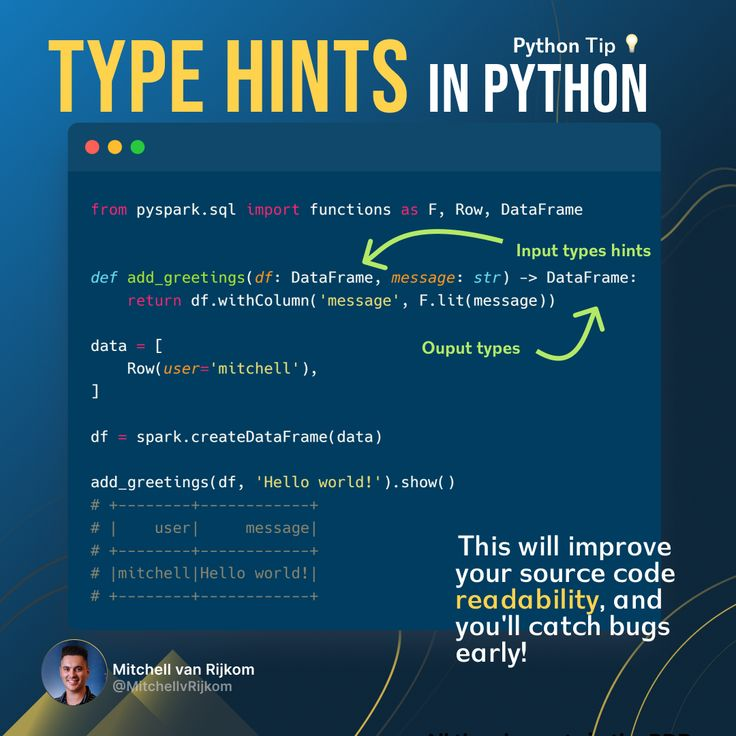


* 類別：指的是 Class
* 型別：指的是 Type


## 基礎類型提示


在變數前以 `變數`: `型別` 方式加入，<br>
回傳 return 值的型別，則在函式後面的 : 前，以 `-> 型別` 來進行，如 `def fun() -> str:`

在 Python 3.9 以前，對於內建的複合類型（如列表和字典），你需要從 typing 模塊導入特定的泛型版本（如 List 和 Dict）。從 Python 3.9 開始，可以直接在這些複合類型上使用泛型註解。

In [9]:
num: int = 5
fruit: str = "banana"

def get_str(num, fruit):
    
    return f"there are {num} {fruit}s"

# 加入 type hint
def get_str(num: int, fruit: str) -> str:
    
    return f"there are {num} {fruit}s"


get_str(num, fruit)

'there are 5 bananas'

In [12]:
## python 3.9 以上版本支援
def test(x: list[int]) -> None:
    pass

word_json: dict[str, int] = {
    "a": 1,
    "b": 2
}

## python 3.9 以下版本支援
from typing import List, Dict

def test(x: List[int]) -> None:
    pass

word_json: Dict[str, int] = {
    "a": 1,
    "b": 2
}


## 複雜類型提示
類型提示系統也支持更複雜的類型註解，例如聯合類型（Union）、可選類型（Optional）以及自定義類型。

### 聯合類型（Union）
在 Python 3.10 及以上版本中，你可以使用 | 符號來表示一個變量可能屬於多種類型之一。這是一種比先前的 Union 更為直觀和簡潔的表示方法。




In [18]:
## python 3.10 以上版本支援
T = str | int

# 定義一個函數，接受字符串或整數作為輸入，並返回它們的連接或相加結果
def concat_or_add(a: T, b: T) -> T:
    if isinstance(a, str) and isinstance(b, str):
        return a + b
    elif isinstance(a, int) and isinstance(b, int):
        return a + b
    else:
        raise ValueError("a 和 b 必須是相同類型")

# 使用此函數
print(concat_or_add("Hello, ", "world!"))  # 輸出: Hello, world!
print(concat_or_add(5, 10))                # 輸出: 15


## python 3.10 以下版本支援
from typing import Union
T = Union[str, int]

# 定義一個函數，接受字符串或整數作為輸入，並返回它們的連接或相加結果
def concat_or_add(a: T, b: T) -> T:
    if isinstance(a, str) and isinstance(b, str):
        return a + b
    elif isinstance(a, int) and isinstance(b, int):
        return a + b
    else:
        raise ValueError("a 和 b 必須是相同類型")

# 使用此函數
print(concat_or_add("Hello, ", "world!"))  # 輸出: Hello, world!
print(concat_or_add(5, 10))                # 輸出: 15


Hello, world!
15
Hello, world!
15


### 與物件導向中的泛型的關係:
泛型允許開發者在定義類、接口或方法時不指定具體的數據類型，從而在使用時可以靈活指定。Python 中使用 | 符號的方式，雖然不是傳統意義上的泛型編程，但它提供了一種靈活指定多種可能類型的方法，從而使函數或方法可以適用於更廣泛的類型範圍，這在某種程度上體現了泛型編程的精神。

### 可選類型（Optional）

在 Python 的類型提示系統中，可選類型（Optional）用於標記一個變量可能不僅僅是某種類型，還可能是 None。在 Python 3.10 及更高版本中，可通過使用 | None 的形式來簡化 Optional 的表示，這使得代碼更加簡潔明瞭。

In [20]:
## python 3.10 以上版本支援

def greet(age: int | None) -> str:
    if age is None:
        return "你好！"
    else:
        return f"你好，你的年齡是 {age} 歲。"

print(greet(None))    # 輸出: 你好！
print(greet(25))      # 輸出: 你好，你的年齡是 25 歲。


## python 3.10 以下版本支援
from typing import Optional

def greet(age: Optional[int] = None) -> str:
    if age is None:
        return "你好！"
    else:
        return f"你好，你的年齡是 {age} 歲。"

print(greet(None))    # 輸出: 你好！
print(greet(25))      # 輸出: 你好，你的年齡是 25 歲。


你好！
你好，你的年齡是 25 歲。
你好！
你好，你的年齡是 25 歲。


## 自定義類型 - NewType (一般用不到 對寫系統的人有幫助而已)
Python 的類型提示系統還支持自定義類型，這對於表示複雜數據結構非常有用。

使用 NewType 來定義類型提示不僅能夠提高代碼的類型安全性和可讀性，還有助於在大型代碼庫中進行更安全和更容易的維護。雖然它在運行時不會引入類型檢查，但它在開發過程中提供了靜態類型檢查的好處，幫助開發者避免類型相關的錯誤。


### 使用 NewType 的目的和好處
- 增強類型安全：通過為不同的概念創建不同的類型，即使它們在底層都是相同的數據類型（例如，整數或字符串），也能避免混淆和錯誤的使用。
- 提高代碼可讀性：使用明確的類型名稱（如 UserId 或 ProUserId），可以讓其他開發者更容易理解代碼的意圖和結構。
- 方便重構和維護：當你需要修改某個特定類型的內部表示時，使用 NewType 可以更容易地定位和更新所有相關的代碼。

### 類別型別提示

In [26]:
##　類別型別提示

class Student:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age

def student_to_string(s: Student) -> str:
    return f"student name: {s.name}, age: {s.age}."

# 使用示例
print(student_to_string(Student("Tim", 18)))


student name: Tim, age: 18.


In [31]:
from typing import NewType

UserId = NewType('UserId', int)

# 使用示例
def get_user_name(user_id: UserId) -> str:
    user_id_x100 = user_id * 3

    return user_id_x100


get_user_name(UserId(123))

369

## 應用案例
假設我們正在開發一個簡單的銀行系統，這個系統需要處理以下 <br>

用戶帳號（AccountId）、交易金額（TransactionAmount）和用戶餘額（Balance）等不同的整數類型。<br>

使用 NewType 可以幫助我們清晰地區分這些看似相同（因為它們都是基於整數的）但實際上代表完全不同概念的類型。

In [32]:
from typing import NewType

# 定義新的類型
AccountId = NewType('AccountId', int)
TransactionAmount = NewType('TransactionAmount', int)
Balance = NewType('Balance', int)


In [34]:
# 使用新類型進行類型提示

def create_account(account_id: AccountId) -> dict:
    # 創建新帳號，初始餘額為 0
    return {"account_id": account_id, "balance": Balance(0)}

def deposit(account: dict, amount: TransactionAmount) -> Balance:
    # 存款操作
    account['balance'] += amount
    return account['balance']

def withdraw(account: dict, amount: TransactionAmount) -> Balance:
    # 提款操作，檢查餘額是否足夠
    if account['balance'] >= amount:
        account['balance'] -= amount
        return account['balance']
    else:
        raise ValueError("餘額不足")

# 使用範例
account_id = AccountId(123456) # 強制轉型為 AccountId 類型
account = create_account(account_id)

deposit_amount = TransactionAmount(1000) # 強制轉型為 TransactionAmount 類型
new_balance = deposit(account, deposit_amount)
print(f"存款後餘額：{new_balance}")

withdraw_amount = TransactionAmount(500) # 強制轉型為 TransactionAmount 類型
new_balance = withdraw(account, withdraw_amount)
print(f"提款後餘額：{new_balance}")


存款後餘額：1000
提款後餘額：500


在這個案例中，我們通過為帳號ID、交易金額和餘額定義專用類型，使得代碼更加清晰和安全。任何嘗試將一個類型錯誤地用於另一個類型的操作的嘗試都會在開發階段被類型檢查器捕捉到，從而避免了運行時錯誤。